# DBSCAN

In [1]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler

<div class="alert alert-info" role="alert">
    <h2>Muestra muy poco balanceada</h2>
    Cogiendo una fracción de los datos, los casos de fraude seran muy reducidos 
</div>

In [2]:
def balancedCut(df ,n ,frac = [0.5], target = 'Class',classes=[0,1]):
    print(f'{"="*50}\nbalancedCut\n{"="*50}')
    print(f'Realizando seleccion de la muestra la muestra')
    newDfs = []
    if sum(frac) > 1:
        print(f'Valor de la fraccion incorrecto: --> {sum(frac)} > 1')
        
    if len(frac) < len(classes):
        frac.append(1-sum(frac))
    
    for cl,fc in zip(classes, frac):
        ndf = df[df[target]==cl]
        ro = ndf.shape[0]
        print(f'Dataset de clase --> {cl}')
        if int(fc*n) > ro:
            newDfs.append(ndf)
            print(f'\tFilas: {ro}')
        else:
            newDfs.append(ndf.sample(n=int(fc*n)))
            print(f'\tFilas: {int(fc*n)}')
    
    return pd.concat(newDfs), newDfs[1].shape[0]/newDfs[0].shape[0]

In [3]:
cards = pd.read_csv("/home/vcalzada/Work/proyecto/modelos/creditcard.csv")
cards = cards.sample(frac=1)


cards.head()

df, frac = balancedCut(cards, 30000, frac=[0.9])

balancedCut
Realizando seleccion de la muestra la muestra
Dataset de clase --> 0
	Filas: 27000
Dataset de clase --> 1
	Filas: 492


In [4]:
#db = DBSCAN(eps=0.5, min_samples=10)

campos = list(cards.keys())
campos.remove("Class")
X = np.array(df[campos])
y = np.array(df["Class"])
scaler = StandardScaler()
X = scaler.fit_transform(X)
#clf.fit(X)
#y_pred = db.fit_predict(X)

# PCA 

In [5]:
pca = PCA(n_components=3)
pca.fit(X)
X_pca = pca.transform(X)

 0     26910
-1       422
 7        38
 6        22
 8        19
 4        13
 9        11
 11       10
 1         8
 3         8
 2         8
 12        8
 10        8
 5         7
dtype: int64
Int64Index([12, 10, 5], dtype='int64')


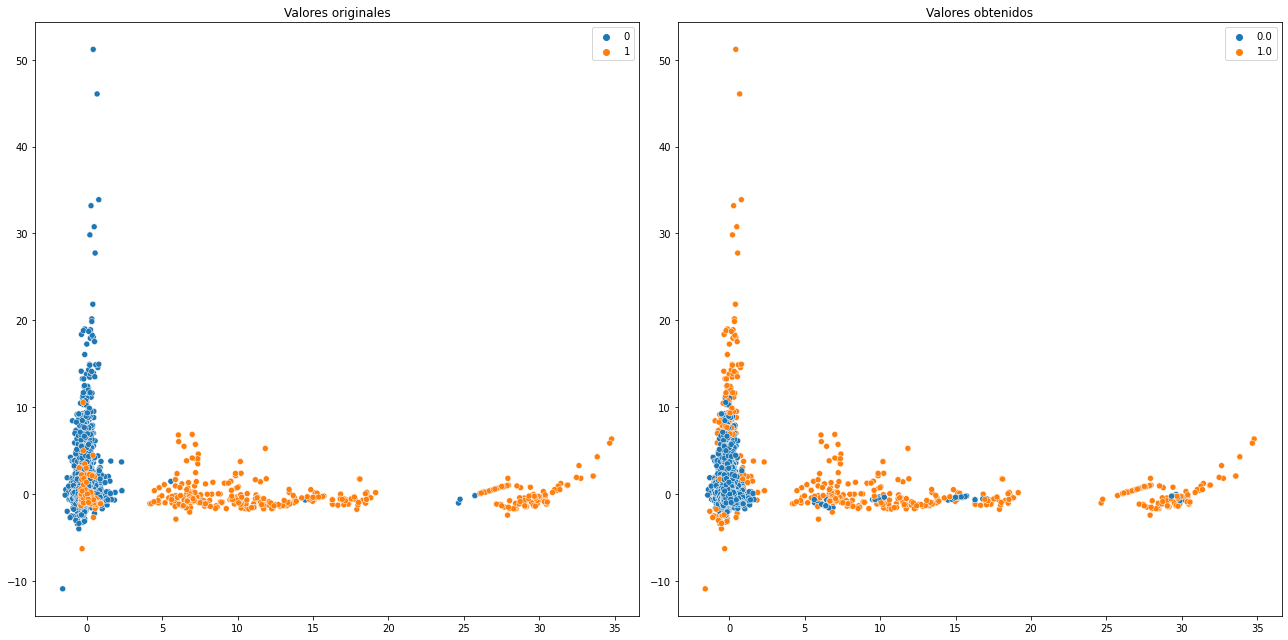

In [70]:
db = DBSCAN(eps=0.6, min_samples=8)

y_pred_pca = db.fit_predict(X_pca)
#y_pred_pca[y_pred_pca==1]=0
#y_pred_pca[y_pred_pca==-1]=1
#cm = confusion_matrix(y, y_pred_pca)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[])
#disp.plot()
p=pd.Series(y_pred_pca).value_counts()
print(p)
pk = p.keys()[-3:]
print(pk)
y_pred = np.zeros(len(y_pred_pca))

for i in n:
    y_pred_pca[y_pred_pca == int(i)] = -1
    
    
y_pred[y_pred_pca!=-1] = 0
y_pred[y_pred_pca==-1] = 1

import seaborn as sns
import matplotlib.pyplot as plt

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(18,9))
sns.scatterplot(ax = ax1, x=X_pca[:,0],y=X_pca[:,1], hue=y)
ax1.set_title('Valores originales')

sns.scatterplot(ax = ax2, x=X_pca[:,0],y=X_pca[:,1], hue=y_pred)
ax2.set_title('Valores obtenidos')
plt.tight_layout()
plt.show()

In [71]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     27000
           1       0.68      0.69      0.68       492

    accuracy                           0.99     27492
   macro avg       0.84      0.84      0.84     27492
weighted avg       0.99      0.99      0.99     27492

